## MediaPipe Solutions

[<img src ="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" align="left">](https://colab.research.google.com/github/spmallick/learnopencv/blob/master/Introduction-to-MediaPipe/MediaPipe-sample-solutions.ipynb)
<br>

Solutions are open-source pre-built examples based on a specific pre-trained TensorFlow or TFLite model. You can check Solution specific models here. MediaPipe Solutions are built on top of the MP Framework. Currently, it provides sixteen solutions as listed below.

 - [Face Detection](https://google.github.io/mediapipe/solutions/face_detection)
 - [Face Mesh](https://google.github.io/mediapipe/solutions/face_mesh)
 - [Iris](https://google.github.io/mediapipe/solutions/iris)
 - [Hands](https://google.github.io/mediapipe/solutions/hands)
 - [Pose](https://google.github.io/mediapipe/solutions/pose)
 - [Holistic](https://google.github.io/mediapipe/solutions/holistic)
 - [Selfie Segmentation](https://google.github.io/mediapipe/solutions/selfie_segmentation)
 - [Hair Segmentation](https://google.github.io/mediapipe/solutions/hair_segmentation)
 - [Object Detection](https://google.github.io/mediapipe/solutions/object_detection)
 - [Box Tracking](https://google.github.io/mediapipe/solutions/box_tracking)
 - [Instant Motion Tracking](https://google.github.io/mediapipe/solutions/instant_motion_tracking)
 - [Objectron](https://google.github.io/mediapipe/solutions/objectron)
 - [KNIFT](https://google.github.io/mediapipe/solutions/knift)
 - [AutoFlip](https://google.github.io/mediapipe/solutions/autoflip)
 - [MediaSequence](https://google.github.io/mediapipe/solutions/media_sequence)
 - [YouTube 8M](https://google.github.io/mediapipe/solutions/youtube_8m)

In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install opencv-python
    !pip install mediapipe
    !wget https://raw.githubusercontent.com/spmallick/learnopencv/blob/master/Introduction-to-MediaPipe/person-full-body.jpg
    !wget https://raw.githubusercontent.com/spmallick/learnopencv/master/Introduction-to-MediaPipe/hand.jpg
else:
    pass

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

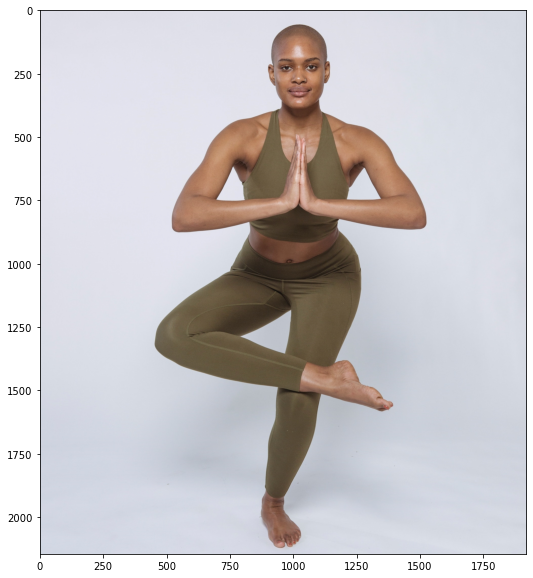

In [3]:
img = cv2.imread('person-full-body.jpg')
plt.figure(figsize=(15,10))
plt.imshow(img[...,::-1]);

### Face Detection

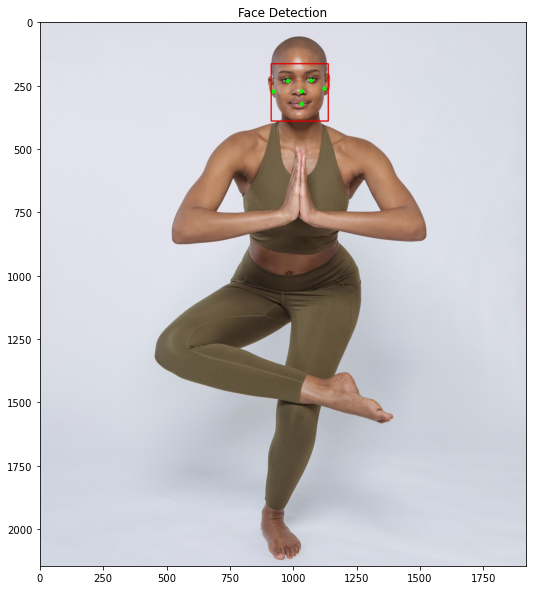

In [4]:
# Initialize face detection solution and drawing utility.
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

# Convert the BGR image to RGB. 
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Process it with MediaPipe Face Detection.
results = face_detection.process(rgb_img)
# print(results.detections)

# Draw face detection.
annotated_img = img.copy()

for detection in results.detections:
    mp_drawing.draw_detection(annotated_img, 
                              detection,
                              keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=5, circle_radius=5),
                              bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 225), thickness=3, circle_radius=3))

# Display.
plt.figure(figsize=(15,10))
plt.imshow(annotated_img[...,::-1])
plt.title("Face Detection");

### Face Mesh

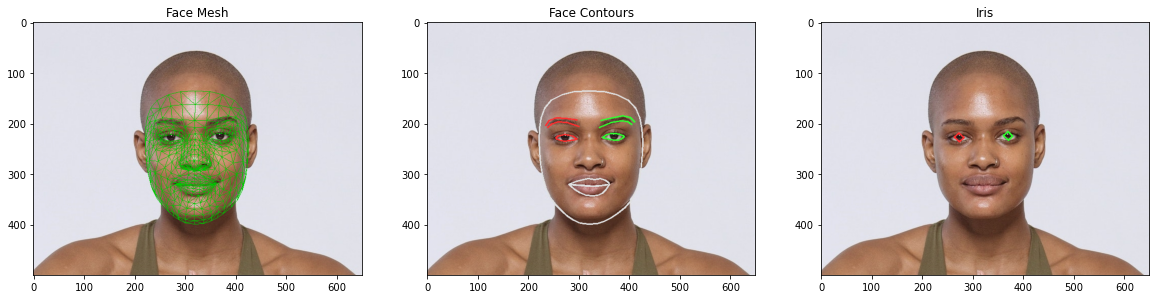

In [5]:
# Initialize face mesh and drawing styles.
mp_face_mesh = mp.solutions.face_mesh
mp_drawing_styles = mp.solutions.drawing_styles

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, 
                                  max_num_faces=1, 
                                  refine_landmarks=True, 
                                  min_detection_confidence=0.5)


# Convert the BGR image to RGB before processing.
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = face_mesh.process(rgb_img)

# Draw face mesh landmarks on the image.
img_mesh = img.copy()
img_contours = img.copy()
img_iris = img.copy()


for face_landmarks in results.multi_face_landmarks:
    # Mesh.
    mp_drawing.draw_landmarks(img_mesh,
                              face_landmarks,
                              mp_face_mesh.FACEMESH_TESSELATION,
                              landmark_drawing_spec=None,
                              connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 200, 0), thickness=1, circle_radius=1))
    # Contours.
    mp_drawing.draw_landmarks(img_contours,
                              face_landmarks,
                              mp_face_mesh.FACEMESH_CONTOURS,
                              landmark_drawing_spec=None,
                              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
    # Iris.
    mp_drawing.draw_landmarks(img_iris,
                              face_landmarks,
                              mp_face_mesh.FACEMESH_IRISES,
                              landmark_drawing_spec=None,
                              connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())

# Display the cropped region (700,0 and 1350,500).
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(img_mesh[...,::-1][0:500, 700:1350])
plt.title('Face Mesh');
plt.subplot(132)
plt.imshow(img_contours[...,::-1][0:500, 700:1350])
plt.title('Face Contours');
plt.subplot(133)
plt.imshow(img_iris[...,::-1][0:500, 700:1350])
plt.title('Iris');

### Hands

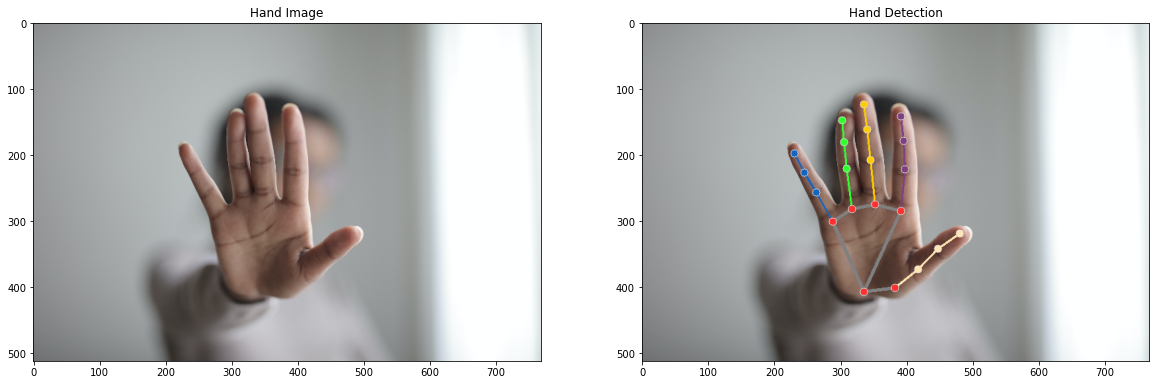

In [6]:
# Initialize MP hands.
mp_hands = mp.solutions.hands

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

# Load hand image.
hand_img = cv2.imread('hand.jpg')

# Resizing the image for faster processing.
hand_img = cv2.resize(hand_img, None, fx=0.1, fy=0.1)

# Convert the BGR image to RGB before processing.
rgb_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2RGB)

# Process.
results = hands.process(rgb_img)

# Draw.
annotated_img = hand_img.copy()
for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(annotated_img,
                              hand_landmarks,
                              mp_hands.HAND_CONNECTIONS,
                              mp_drawing_styles.get_default_hand_landmarks_style(),
                              mp_drawing_styles.get_default_hand_connections_style())
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(hand_img[...,::-1])
plt.title('Hand Image')
plt.subplot(122)
plt.imshow(annotated_img[...,::-1])
plt.title('Hand Detection');

### Pose

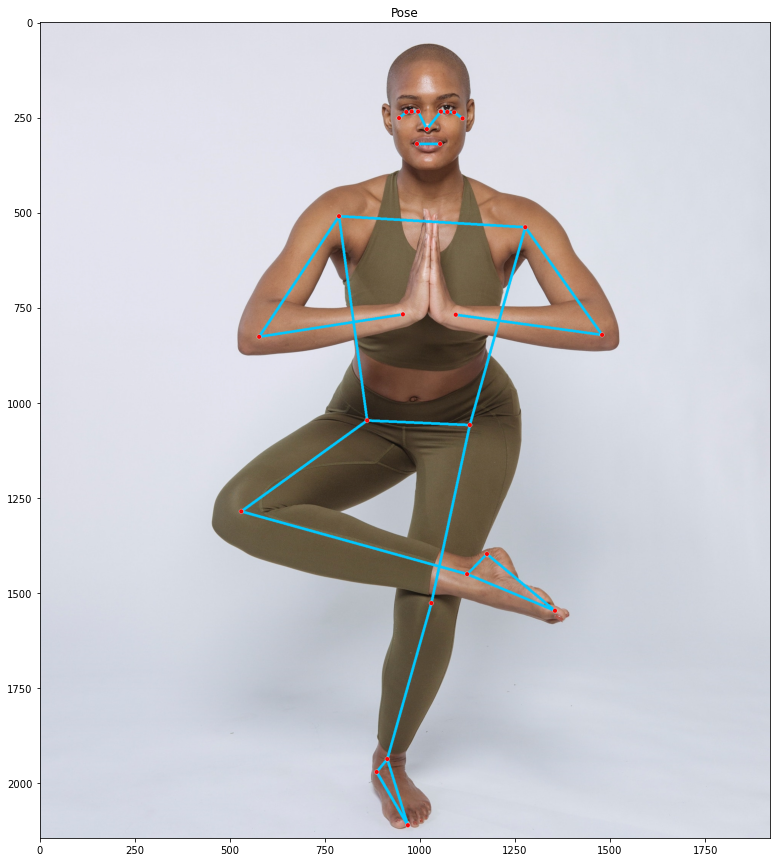

In [7]:
# Initialize MP pose.
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True,
                    model_complexity=2,
                    enable_segmentation=True,
                    min_detection_confidence=0.5)
# Convert to RGB.
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Process.
results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

annotated_img = img.copy()

# Draw pose landmarks on the image.
mp_drawing.draw_landmarks(annotated_img,
                          results.pose_landmarks,
                          mp_pose.POSE_CONNECTIONS,
                          # Keep default style or write your own.
                          # landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
                          landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=3, circle_radius=3),
                          connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 200, 0), thickness=5, circle_radius=5))
# Display.
plt.figure(figsize=(20,15))
plt.imshow(annotated_img[...,::-1])
plt.title('Pose');